### Code to preprocess fixations.csv from pupil labs andb plot speed and orientation of sacades

In [1]:
import sys
sys.path.append('../../')
import pyeyemo.gaze.gaze_commons as gm
import pandas as pd
from pathlib import Path
from itertools import compress
import os
import numpy as np
from os import listdir
from os.path import isfile, join,isdir
import matplotlib.pyplot  as plt


## Get the list of directories we want to analyse and copy paste the information in sessions.tx


In [2]:

session_location = Path(r"P:\Proyectos\2020\PY200016 - XSCAPE\Trabajo\00 XPERIMENTS\01 EXPERIMENTS_Santiago\01 ONGOING\Exp_Stgo_0004_Real_pots\03_EXP004_SESSIONS")
data_path=Path(r"data/real_pots/") #folder whre csvs sill be saved
sessions=[]
df_list_fixations=[]
annotation_list=['Asset'] # list of names that have assets
exported_number_fixations_csv=data_path.joinpath('number_fixations.csv') 

onlyfiles = [f for f in listdir(session_location) if isdir(join(session_location, f))]
for dir in onlyfiles:
 print (dir,flush=True)

0ES0004_S001_PC
0ES0004_S003_PC
0ES0004_S005_PC
0ES0004_S006_PC
0ES0004_S009_PC
0ES0004_S010_PC
0ES0004_S013_PC
0ES0004_S014_PC
0ES0004_S015_PC
0ES0004_S016_PC
0ES0004_S017_PC
0ES0004_S018_PC
0ES0004_S023_PC
0ES0004_S024_PC
0ES0004_S025_PC
0ES0004_S027_PC
0ES0004_S028_PC
0ES0004_S029_PC
0ES0004_S030_PC
ES0004_S002_PC
ES0004_S004_PC
ES0004_S007_PC
ES0004_S008_PC
ES0004_S011_PC
ES0004_S012_PC
ES0004_S019_PC
ES0004_S020_PC
ES0004_S021_PC
ES0004_S022_PC
ES0004_S026_PC
ES0004_S031_PC
ES0004_S032_PC


### Do the automatic analysis for sacades extraction

In [3]:
with open('session.txt','r') as f:
    for session in f:
            sessions.append(session.replace('\n',''))
f.close()
# session_loc_list=[session_location.joinpath(session,'01 Processing_data','pupil_labs') for session in sessions ]
session_loc_list=[session_location.joinpath(session,'01 Processing_data') for session in sessions ]


for session, recording_location in zip(sessions,session_loc_list):

    data_paths=gm.extract_session_path_pupil_labs(recording_location=recording_location,
                                       subject=session)
    
    annotations_csv = data_paths['annotations']
    fixations_csv = data_paths['annotations']
    fixations_surf_csv = data_paths['fixations_surf']
    exported_gaze_csv=data_path.joinpath(f'{session}_saccades.csv') 


    # Now isntantitate an eye object and do the operations
    subject=gm.Eye(session)
    print(f'Analiysing session: {subject.name}, annotations: {annotations_csv}, gaze: {fixations_csv}')

    subject.load_fixations(fixations_dir=fixations_surf_csv)
    subject.load_annotations(annotation_dir=annotations_csv)
    subject.label_data_annotation()
    subject.eliminate_duplicates(df=subject.fixations)
    subject.calculate_distance()
    subject.calculate_speed_saccades()
    subject.saccade_angle(angle='degrees_0_360')
    subject.vertical_horizontal_sacades()
    subject.group_data()
    subject.group_data_on_surface()
    subject.labels_to_analyse(annotation_list)
    subject.filter_labels(subject.annotations['label'])
    subject.number_fixations_on_off_surface()
    subject.average_saccade_distance()
    subject.average_sacade_speed()
    subject.average_fixation_time()
    subject.total_fixation_time()
    subject.test_data_table()

    ## Finally remove first row and only keep true surface values
    # All callculations are done with prepend, so we must allways delete 
    # the firs row previos to analysis
    subject.fixations=(subject.fixations.iloc[1:,:]
               # .query('on_surf == false')
                )
    subject.fixations.to_csv(exported_gaze_csv,index=False)

    df_list_fixations.append(subject.data_matrix)
df_list_fixations_concat_df=pd.concat(df_list_fixations,axis=0,ignore_index=True)
df_list_fixations_concat_df.to_csv(exported_number_fixations_csv)

    

['002']
Analiysing session: 0ES0004_S001_PC, annotations: P:\Proyectos\2020\PY200016 - XSCAPE\Trabajo\00 XPERIMENTS\01 EXPERIMENTS_Santiago\01 ONGOING\Exp_Stgo_0004_Real_pots\03_EXP004_SESSIONS\0ES0004_S001_PC\01 Processing_data\002\exports\001\annotations.csv, gaze: P:\Proyectos\2020\PY200016 - XSCAPE\Trabajo\00 XPERIMENTS\01 EXPERIMENTS_Santiago\01 ONGOING\Exp_Stgo_0004_Real_pots\03_EXP004_SESSIONS\0ES0004_S001_PC\01 Processing_data\002\exports\001\annotations.csv
annotations are correct
['000']
Analiysing session: 0ES0004_S003_PC, annotations: P:\Proyectos\2020\PY200016 - XSCAPE\Trabajo\00 XPERIMENTS\01 EXPERIMENTS_Santiago\01 ONGOING\Exp_Stgo_0004_Real_pots\03_EXP004_SESSIONS\0ES0004_S003_PC\01 Processing_data\000\exports\000\annotations.csv, gaze: P:\Proyectos\2020\PY200016 - XSCAPE\Trabajo\00 XPERIMENTS\01 EXPERIMENTS_Santiago\01 ONGOING\Exp_Stgo_0004_Real_pots\03_EXP004_SESSIONS\0ES0004_S003_PC\01 Processing_data\000\exports\000\annotations.csv
annotations are correct
['000']
An

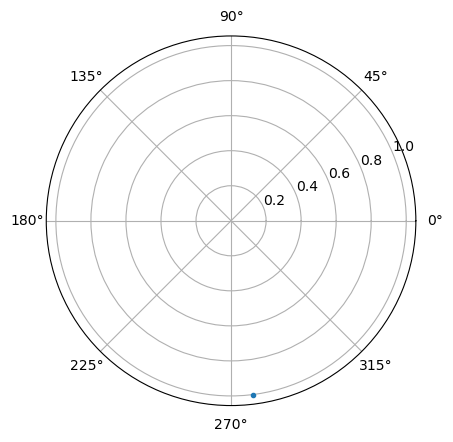

In [17]:
angles=subject.fixations['angle']
distance=subject.fixations['distance']
r = np.linspace(0, 2, angles.shape[0])

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
# ax.plot(subject.fixations['angle'], distance,'.')
ax.plot(-1.444126, 1,'.')

# ax.set_rmax(2)
# ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
# ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)